In [ ]:
#search the file
from google.colab import files
df=files.upload()

Saving Dataset .csv to Dataset  (1).csv


In [ ]:
#load the data
import pandas as pd
df=pd.read_csv("Dataset  (1).csv")
print(df.to_string())

      Restaurant ID                                         Restaurant Name  Country Code                    City                                                                                                                               Address                                             Locality                                                  Locality Verbose   Longitude   Latitude                                                                                       Cuisines  Average Cost for two                Currency Has Table booking Has Online delivery Is delivering now Switch to order menu  Price range  Aggregate rating Rating color Rating text  Votes
0           6317637                                        Le Petit Souffle           162             Makati City                                                               Third Floor, Century City Mall, Kalayaan Avenue, Poblacion, Makati City            Century City Mall, Poblacion, Makati City            Century City Mall

In [ ]:
#more information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [ ]:
#give number of rows and columns
df.shape

(9551, 21)

In [ ]:
#identify missing values
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [ ]:
print(df[df['Cuisines'].isnull()])


     Restaurant ID                 Restaurant Name Country Code  \
84        17284105                   Cookie Shoppe          216   
87        17284211  Pearly's Famous Country Cookng          216   
94        17284158               Jimmie's Hot Dogs          216   
297       17374552                  Corkscrew Cafe          216   
328       17501439                        Dovetail          216   
346       17606621            HI Lite Bar & Lounge          216   
368       17059060                       Hillstone          216   
418       17142698                Leonard's Bakery          216   
455       17616465        Tybee Island Social Club          216   

               City                                          Address  \
84           Albany               115 N Jackson St, Albany, GA 31701   
87           Albany             814 N Slappey Blvd, Albany, GA 31701   
94           Albany               204 S Jackson St, Albany, GA 31701   
297     Gainesville                51 W M

In [ ]:
df['Cuisines'].fillna('Unknown', inplace=True)


/tmp/ipython-input-863532844.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cuisines'].fillna('Unknown', inplace=True)


In [ ]:
print(df['Cuisines'].isnull().sum())


0


In [86]:
#convert datatype
df['Country Code']=df['Country Code'].astype("str")
df['Latitude']=df['Latitude'].astype("float")
df['Longitude']=df['Longitude'].astype("float")
print(df['Country Code'].dtype)
print(df['Latitude'].dtype)
print(df['Longitude'].dtype)

object
float64
float64


/tmp/ipython-input-2552177166.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0,0].legend(title='Rating')
/tmp/ipython-input-2552177166.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0,1].legend(title='TableAvailability')


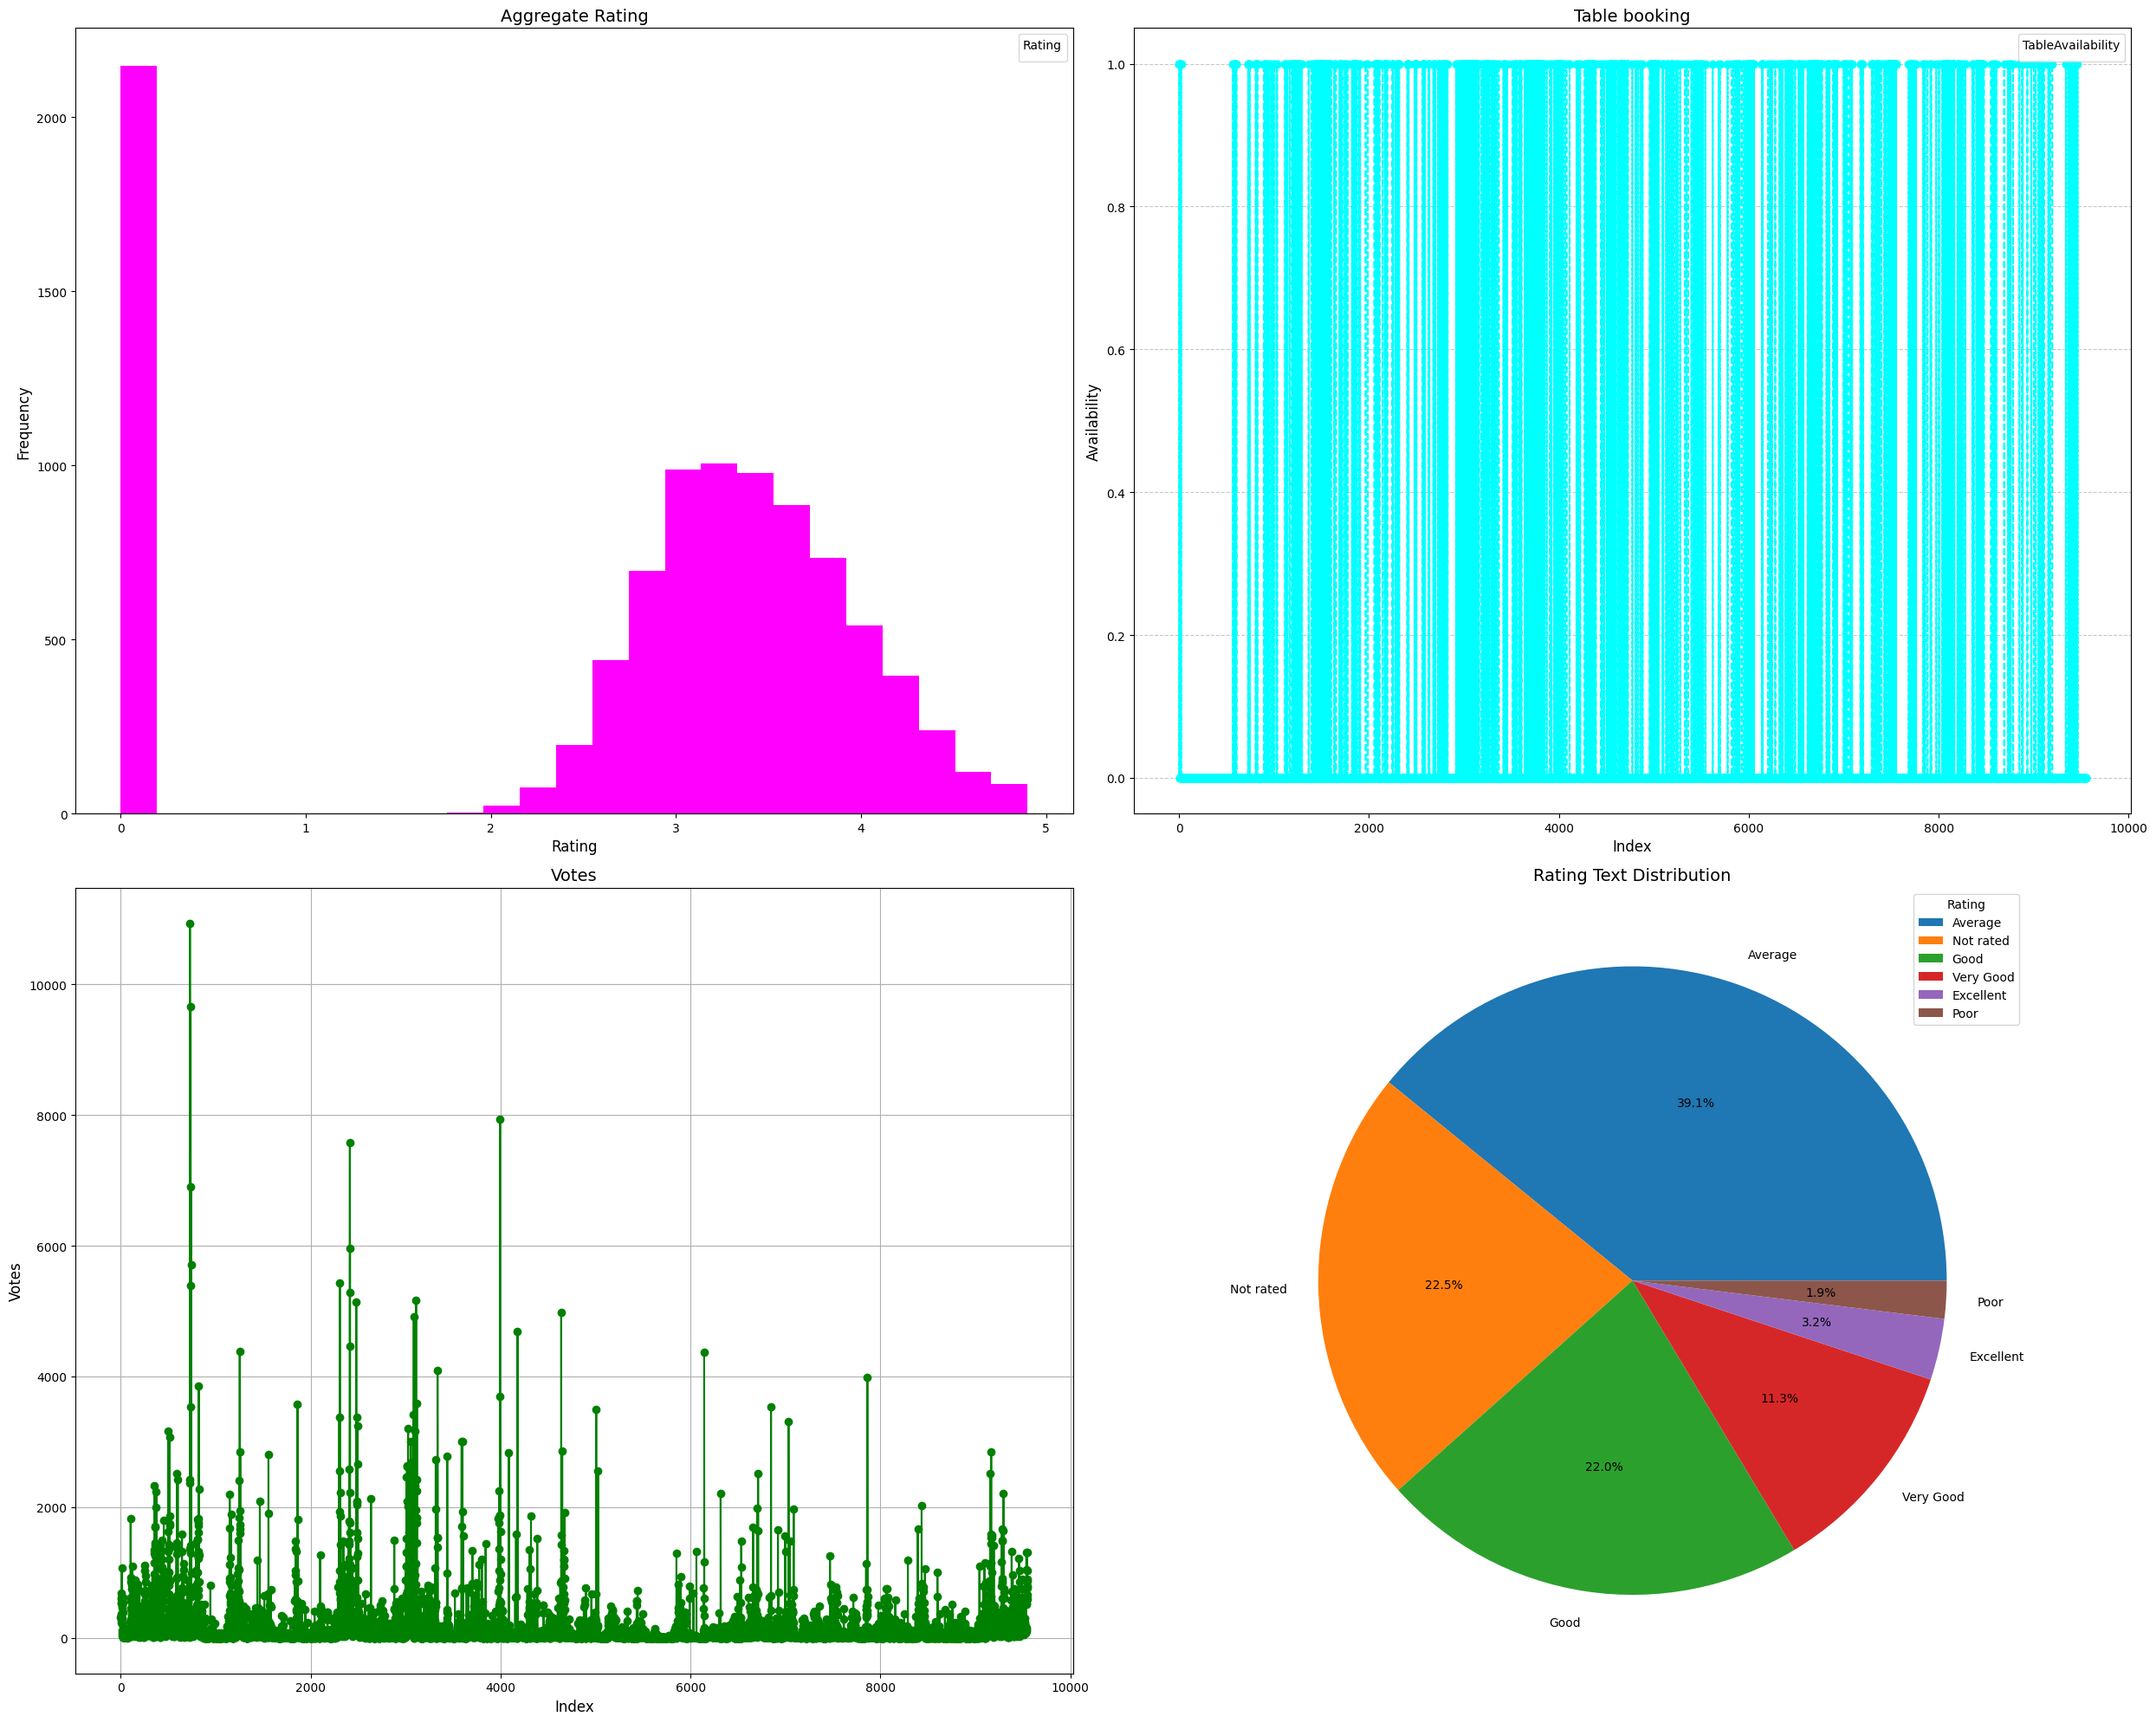

In [ ]:
#Aggregate rating
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df=pd.read_csv("Dataset  (1).csv")
fig,axs=plt.subplots(2,2,figsize=(25,20))
axs[0,0].hist(df['Aggregate rating'],color='magenta',bins=25)
axs[0,0].set_title('Aggregate Rating',fontsize=14)
axs[0,0].set_xlabel('Rating' ,fontsize=12)
axs[0,0].set_ylabel('Frequency' ,fontsize=12)
axs[0,0].legend(title='Rating')
df['Has Table booking'] = df['Has Table booking'].apply(lambda x: 1 if x == 'Yes' else 0)
axs[0,1].plot(df.index,df['Has Table booking'],color='cyan',marker='o',linestyle='--')
axs[0,1].set_title('Table booking',fontsize=14)
axs[0,1].set_xlabel('Index' ,fontsize=12)
axs[0,1].set_ylabel('Availability' ,fontsize=12)
axs[0,1].grid(axis='y',linestyle='--',alpha=0.7)
axs[0,1].legend(title='TableAvailability')
axs[1,0].plot(df.index,df['Votes'],marker='o',color='green')
axs[1,0].set_title('Votes',fontsize=14)
axs[1,0].set_xlabel('Index' ,fontsize=12)
axs[1,0].set_ylabel('Votes' ,fontsize=12)
axs[1,0].grid(True)
rating_counts = df['Rating text'].value_counts()
axs[1,1].pie(rating_counts.values, labels=rating_counts.index, autopct='%1.1f%%')
axs[1,1].set_title('Rating Text Distribution',fontsize=14)
axs[1,1].legend(title='Rating')
plt.tight_layout()
plt.show()

In [ ]:
print(df.dtypes)


Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking         int64
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object


In [ ]:
print(df['Aggregate rating'].value_counts())


Aggregate rating
0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: count, dtype: int64


In [ ]:
print(df['Aggregate rating'].describe())


count    9551.000000
mean        2.666370
std         1.516378
min         0.000000
25%         2.500000
50%         3.200000
75%         3.700000
max         4.900000
Name: Aggregate rating, dtype: float64


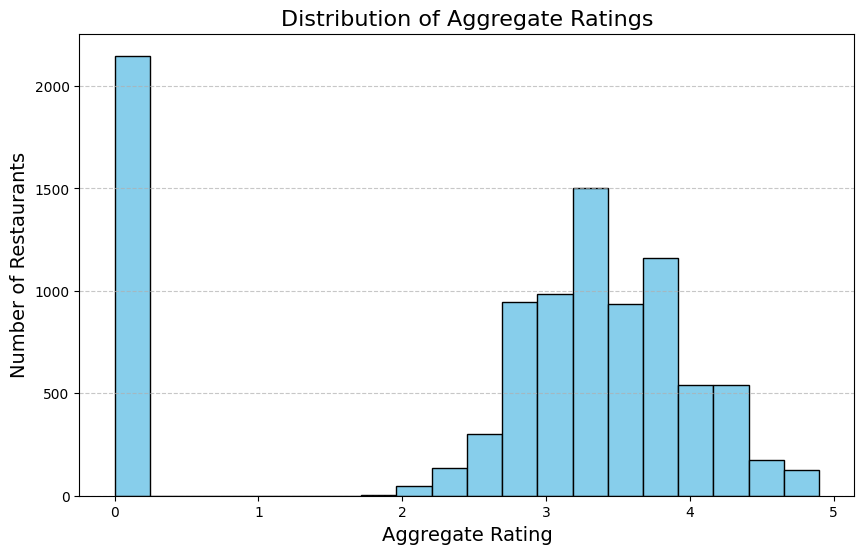

In [78]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.hist(df['Aggregate rating'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Aggregate Ratings', fontsize=16)
plt.xlabel('Aggregate Rating', fontsize=14)
plt.ylabel('Number of Restaurants', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [81]:
df = df[df['Aggregate rating'] > 0]
print(df)

      Restaurant ID           Restaurant Name Country Code              City  \
0           6317637          Le Petit Souffle          162       Makati City   
1           6304287          Izakaya Kikufuji          162       Makati City   
2           6300002    Heat - Edsa Shangri-La          162  Mandaluyong City   
3           6318506                      Ooma          162  Mandaluyong City   
4           6314302               Sambo Kojin          162  Mandaluyong City   
...             ...                       ...          ...               ...   
9546        5915730               Naml۱ Gurme          208         ��stanbul   
9547        5908749              Ceviz A��ac۱          208         ��stanbul   
9548        5915807                     Huqqa          208         ��stanbul   
9549        5916112               A���k Kahve          208         ��stanbul   
9550        5927402  Walter's Coffee Roastery          208         ��stanbul   

                                       

In [82]:
# Create rating categories
bins = [0, 2.5, 3.5, 5]
labels = ['Low', 'Medium', 'High']
df['Rating Category'] = pd.cut(df['Aggregate rating'], bins=bins, labels=labels)
print(df['Rating Category'].value_counts())


Rating Category
Medium    4107
High      3000
Low        296
Name: count, dtype: int64


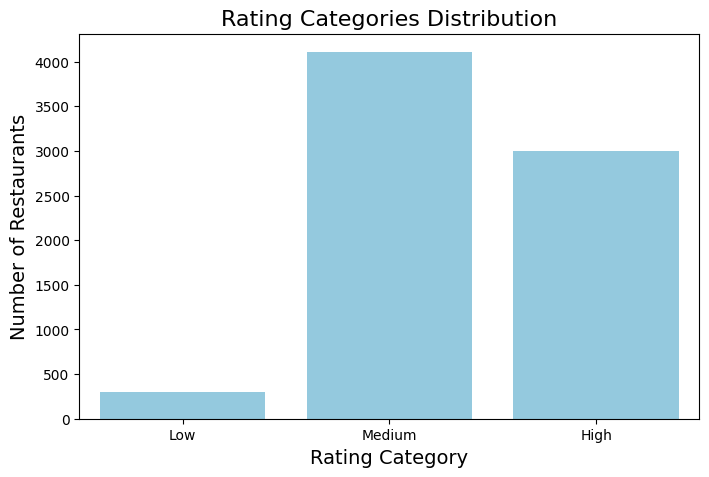

In [84]:
import seaborn as sns
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Rating Category', color='skyblue')
plt.title('Rating Categories Distribution', fontsize=16)
plt.xlabel('Rating Category', fontsize=14)
plt.ylabel('Number of Restaurants', fontsize=14)
plt.show()
